In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()
%matplotlib inline

In [39]:
batters_df = pd.read_csv('offense/all_batting_years_1985_to_2017.csv')
#batters_df.sort_values('ERA', inplace=True)

batters_df.shape



/Users/Munoz/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(17250, 38)

In [40]:
batters_df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'ID', 'NAME', 'BATS', 'HEIGHT', 'WEIGHT',
       'YEAR', 'AGE', 'TM', 'LG', 'G', 'PA', 'AB', 'R', 'H', '2B', '3B', 'HR',
       'RBI', 'SB', 'CS', 'BB', 'SO', 'BA', 'OBP', 'SLG', 'OPS', 'OPS+', 'TB',
       'GDP', 'HBP', 'SH', 'SF', 'IBB', 'POS', 'AWARDS', 'SALARY'],
      dtype='object')

In [41]:
del batters_df['Unnamed: 0.1']

In [42]:
del batters_df['Unnamed: 0']

In [43]:
batters_df.sample(5)

,ID,NAME,BATS,HEIGHT,WEIGHT,YEAR,AGE,TM,LG,G,...,OPS+,TB,GDP,HBP,SH,SF,IBB,POS,AWARDS,SALARY
13585,rojasmi02,Miguel Rojas,Right,71,195,2016,27.0,MIA,NL,123,...,69.0,63.0,10.0,1.0,6.0,2.0,2.0,4365,NaN,"$511,000"
13419,riverre01,René Rivera,Right,70,215,2014,30.0,SDP,NL,103,...,116.0,127.0,6.0,3.0,3.0,2.0,3.0,2/3,NaN,"$506,400"
3705,davisch01,Chili Davis,Both,75,195,1995,35.0,CAL,AL,119,...,146.0,218.0,12.0,0.0,0.0,9.0,12.0,*D,NaN,"$3,800,000"
1493,blumge01,Geoff Blum,Both,75,220,2008,35.0,HOU,NL,114,...,85.0,136.0,5.0,3.0,0.0,7.0,2.0,5/436,NaN,"$1,100,000"
2528,canoro01,Robinson Canó,Left,72,210,2009,26.0,NYY,AL,161,...,121.0,331.0,22.0,3.0,0.0,4.0,2.0,*4,MVP-17,"$6,000,000"


In [44]:
columns_of_interest = ['NAME', 'YEAR', 'AGE', 'TM',
       'AB', 'R', 'H', '2B', 'OPS', 'HR', 'RBI', 'BB',
       'SO', 'BA', 'OBP', 'OPS', 'SLG', 'SALARY']


batters_df[columns_of_interest].sample(10)

,NAME,YEAR,AGE,TM,AB,R,H,2B,OPS,HR,RBI,BB,SO,BA,OBP,OPS,SLG,SALARY
1486,Geoff Blum,2003,30.0,HOU,420.0,51.0,110.0,19.0,0.674,10.0,52.0,20.0,50.0,0.262,0.295,0.674,0.379,"$1,500,000"
7238,Todd Hollandsworth,1999,26.0,LAD,261.0,39.0,74.0,12.0,0.793,9.0,32.0,24.0,61.0,0.284,0.345,0.793,0.448,"$850,000"
10501,Hal McRae,1987,41.0,KCR,32.0,5.0,10.0,3.0,0.905,1.0,9.0,5.0,1.0,0.313,0.405,0.905,0.500,"$110,000"
6094,Shawn Green,2005,32.0,ARI,581.0,87.0,166.0,37.0,0.832,22.0,73.0,62.0,95.0,0.286,0.355,0.832,0.477,"$7,833,333"
12175,Joc Pederson,2016,24.0,LAD,406.0,64.0,100.0,26.0,0.847,25.0,68.0,63.0,130.0,0.246,0.352,0.847,0.495,"$520,000"
728,Bret Barberie,1994,26.0,FLA,372.0,40.0,112.0,20.0,0.762,5.0,31.0,23.0,65.0,0.301,0.356,0.762,0.406,"$302,500"
12347,Eddie Pérez,2005,37.0,ATL,38.0,3.0,8.0,2.0,0.652,2.0,6.0,1.0,5.0,0.211,0.231,0.652,0.421,"$625,000"
9754,Ron Mahay,2000,29.0,TOT,4.0,0.0,2.0,1.0,1.250,0.0,0.0,0.0,1.0,0.500,0.500,1.250,0.750,"$217,000"
10176,Joe Mauer,2013,30.0,MIN,445.0,62.0,144.0,35.0,0.880,11.0,47.0,61.0,89.0,0.324,0.404,0.880,0.476,"$23,000,000"
14592,Lonnie Smith,1989,33.0,ATL,482.0,89.0,152.0,34.0,0.948,21.0,79.0,76.0,95.0,0.315,0.415,0.948,0.533,"$400,000"


In [45]:
batters_df = pd.get_dummies(batters_df, columns=['BATS'])
batters_df.head(5)

,ID,NAME,HEIGHT,WEIGHT,YEAR,AGE,TM,LG,G,PA,...,HBP,SH,SF,IBB,POS,AWARDS,SALARY,BATS_Both,BATS_Left,BATS_Right
0,abadan01,Andy Abad,73,184,2006,33.0,CIN,NL,5,5.0,...,0.0,0.0,0.0,0.0,NaN,NaN,"$327,000",0,1,0
1,abbotje01,Jeff Abbott,74,190,1998,25.0,CHW,AL,89,261.0,...,0.0,2.0,5.0,1.0,897/D,NaN,"$175,000",0,0,1
2,abbotje01,Jeff Abbott,74,190,1999,26.0,CHW,AL,17,64.0,...,0.0,1.0,1.0,0.0,7,NaN,"$255,000",0,0,1
3,abbotje01,Jeff Abbott,74,190,2000,27.0,CHW,AL,80,242.0,...,2.0,2.0,1.0,1.0,879/D,NaN,"$255,000",0,0,1
4,abbotje01,Jeff Abbott,74,190,2001,28.0,FLA,NL,28,46.0,...,1.0,0.0,0.0,0.0,/897,NaN,"$300,000",0,0,1


In [46]:
# Handle switch hitters by setting the left/right columns and dropping the both column
batters_df.loc[batters_df.BATS_Both == 1, 'BATS_Left'] = 1
batters_df.loc[batters_df.BATS_Both == 1, 'BATS_Right'] = 1

del batters_df['BATS_Both']

In [47]:
batters_df[columns_of_interest].describe()

,YEAR,AGE,AB,R,H,2B,OPS,HR,RBI,BB,SO,BA,OBP,OPS,SLG
count,17250.000000,17249.000000,17249.000000,17249.000000,17249.000000,17249.000000,17196.000000,17249.000000,17249.000000,17249.000000,17249.000000,17196.000000,17197.000000,17196.000000,17196.000000
mean,2001.229681,29.238391,290.395733,39.544669,77.164357,14.931648,0.700298,8.784393,37.709606,28.729955,53.613659,0.248506,0.315718,0.700298,0.384630
std,9.228491,4.108567,189.923907,30.672105,55.444363,11.637095,0.167275,9.622565,30.922070,24.282121,38.201460,0.059308,0.066258,0.167275,0.111722
min,1985.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1994.000000,26.000000,123.000000,13.000000,28.000000,5.000000,0.626000,2.000000,12.000000,10.000000,23.000000,0.226000,0.289000,0.626000,0.329000
50%,2001.000000,29.000000,269.000000,33.000000,68.000000,13.000000,0.713000,5.000000,30.000000,23.000000,47.000000,0.255000,0.322000,0.713000,0.389000
75%,2009.000000,32.000000,458.000000,62.000000,122.000000,23.000000,0.793000,13.000000,57.000000,42.000000,78.000000,0.281000,0.352000,0.793000,0.449000
max,2017.000000,48.000000,716.000000,152.000000,262.000000,59.000000,2.667000,73.000000,165.000000,232.000000,223.000000,1.000000,1.000000,2.667000,2.000000


In [48]:
batters_df[columns_of_interest].sort_values('HR').tail(10)

,NAME,YEAR,AGE,TM,AB,R,H,2B,OPS,HR,RBI,BB,SO,BA,OBP,OPS,SLG,SALARY
7346,Ryan Howard,2006,26.0,PHI,581.0,104.0,182.0,25.0,1.084,58.0,149.0,108.0,181.0,0.313,0.425,1.084,0.659,"$355,000"
10412,Mark McGwire,1997,33.0,TOT,540.0,86.0,148.0,27.0,1.039,58.0,123.0,101.0,159.0,0.274,0.393,1.039,0.646,"$7,150,000"
14944,Giancarlo Stanton,2017,27.0,MIA,597.0,123.0,168.0,32.0,1.007,59.0,132.0,85.0,163.0,0.281,0.376,1.007,0.631,"$14,500,000"
14759,Sammy Sosa,1999,30.0,CHC,625.0,114.0,180.0,24.0,1.002,63.0,141.0,78.0,171.0,0.288,0.367,1.002,0.635,"$9,000,000"
14761,Sammy Sosa,2001,32.0,CHC,577.0,146.0,189.0,34.0,1.174,64.0,160.0,116.0,153.0,0.328,0.437,1.174,0.737,"$12,500,000"
10416,Mark McGwire,1999,35.0,STL,521.0,118.0,145.0,21.0,1.120,65.0,147.0,133.0,141.0,0.278,0.424,1.120,0.697,"$9,358,667"
14758,Sammy Sosa,1998,29.0,CHC,643.0,134.0,198.0,20.0,1.024,66.0,158.0,73.0,171.0,0.308,0.377,1.024,0.647,"$8,325,000"
10415,Mark McGwire,1998,34.0,STL,509.0,130.0,152.0,21.0,1.222,70.0,147.0,162.0,155.0,0.299,0.470,1.222,0.752,"$8,928,354"
1561,Barry Bonds,2001,36.0,SFG,476.0,129.0,156.0,32.0,1.379,73.0,137.0,177.0,93.0,0.328,0.515,1.379,0.863,"$10,300,000"
16072,Randy Velarde,1997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
# When a player is traded mid season, they have multiple rows
# To handle these cases we will keep the 'total' row (TOT) but use the 
#batters_df[batters_df.NAME == 'Bert Blyleven'].sort_values(['YEAR','AB'])[columns_of_interest].head(3)


In [50]:
#TODO figure out how to copy a non 'TOT' team to all of the group,
# then drop all the rows except for the one with the highest BF
#res = batters_df.sort_values('BF', ascending=False).groupby(['YEAR'])['TM'].transform(lambda x:x.first).reset_index()
batters_df.shape

(17250, 37)

In [51]:
batters_df = batters_df.sort_values('PA').drop_duplicates(subset=['ID', 'YEAR'], keep='last')

In [52]:
batters_df.shape

(14468, 37)

In [53]:
# Randy Velarde has a season with incomplete information, drop it
batters_df = batters_df[~batters_df.SALARY.isnull()]

In [54]:
# Now we need to clean out players with very very few plate appearances
# (TODO Remove pitchers that managed to sneak in)
batters_df.sort_values('PA', inplace=True)
batters_df[batters_df.PA < 30][columns_of_interest]

,NAME,YEAR,AGE,TM,AB,R,H,2B,OPS,HR,RBI,BB,SO,BA,OBP,OPS,SLG,SALARY
827,Brian Barton,2009,27.0,ATL,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,"$402,000"
12761,Jason Pridie,2009,25.0,MIN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,"$400,000"
7298,Darren Holmes,2003,37.0,ATL,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,"$700,000"
10465,Greg McMichael,1996,29.0,ATL,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,"$460,000"
8044,John Johnstone,1993,24.0,FLA,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,"$109,000"
9764,Ron Mahay,2009,38.0,KCR,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,"$4,000,000"
3045,Jermaine Clark,2001,24.0,DET,0.0,1.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,"$200,000"
2566,Ramón Caraballo,1993,24.0,ATL,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,"$109,000"
120,Manny Alexander,1993,22.0,BAL,0.0,1.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,"$109,000"
9762,Ron Mahay,2008,37.0,KCR,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,"$4,000,000"


In [55]:
#remove the above batters
batters_df = batters_df[batters_df.PA >= 30]

In [56]:
batters_df['SALARY'] = batters_df['SALARY'].str.replace('$','')
batters_df['SALARY'] = batters_df['SALARY'].str.replace(',','')
batters_df['SALARY'] = batters_df['SALARY'].astype('int64')

In [57]:
batters_df[columns_of_interest].sort_values('SALARY').tail(20)

,NAME,YEAR,AGE,TM,AB,R,H,2B,OPS,HR,RBI,BB,SO,BA,OBP,OPS,SLG,SALARY
2535,Robinson Canó,2016,33.0,SEA,655.0,107.0,195.0,33.0,0.882,39.0,103.0,47.0,100.0,0.298,0.350,0.882,0.533,24000000
4838,Prince Fielder,2015,31.0,TEX,613.0,78.0,187.0,28.0,0.841,23.0,98.0,64.0,88.0,0.305,0.378,0.841,0.463,24000000
4839,Prince Fielder,2016,32.0,TEX,326.0,29.0,69.0,16.0,0.626,8.0,44.0,32.0,63.0,0.212,0.292,0.626,0.334,24000000
7354,Ryan Howard,2014,34.0,PHI,569.0,65.0,127.0,18.0,0.690,23.0,95.0,67.0,190.0,0.223,0.310,0.690,0.380,25000000
12827,Albert Pujols,2016,36.0,LAA,593.0,71.0,159.0,19.0,0.780,31.0,119.0,49.0,75.0,0.268,0.323,0.780,0.457,25000000
7356,Ryan Howard,2016,36.0,PHI,331.0,35.0,65.0,10.0,0.710,25.0,59.0,27.0,114.0,0.196,0.257,0.710,0.453,25000000
7355,Ryan Howard,2015,35.0,PHI,467.0,53.0,107.0,29.0,0.720,23.0,77.0,27.0,138.0,0.229,0.277,0.720,0.443,25000000
12828,Albert Pujols,2017,37.0,LAA,593.0,53.0,143.0,17.0,0.672,23.0,101.0,37.0,93.0,0.241,0.286,0.672,0.386,26000000
13505,Álex Rodríguez,2005,29.0,NYY,605.0,124.0,194.0,29.0,1.031,48.0,130.0,91.0,139.0,0.321,0.421,1.031,0.610,26000000
16499,Vernon Wells,2011,32.0,LAA,505.0,60.0,110.0,15.0,0.660,25.0,66.0,20.0,86.0,0.218,0.248,0.660,0.412,26187500


In [58]:
batters_df[columns_of_interest].corr()

,YEAR,AGE,AB,R,H,2B,OPS,HR,RBI,BB,SO,BA,OBP,OPS,SLG,SALARY
YEAR,1.000000,0.043575,0.055973,0.040639,0.041210,0.097546,0.017392,0.096188,0.046307,0.007691,0.218775,-0.050346,-0.043627,0.017392,0.048302,0.369207
AGE,0.043575,1.000000,-0.036708,-0.045574,-0.034784,-0.035136,0.018223,-0.006028,0.003319,0.056363,-0.096650,-0.001316,0.072889,0.018223,-0.012925,0.322160
AB,0.055973,-0.036708,1.000000,0.927475,0.979368,0.894901,0.531783,0.685261,0.865647,0.753648,0.771565,0.520285,0.456753,0.531783,0.518839,0.342120
R,0.040639,-0.045574,0.927475,1.000000,0.944264,0.874145,0.660299,0.762783,0.877865,0.827625,0.740038,0.577903,0.585077,0.660299,0.634613,0.358457
H,0.041210,-0.034784,0.979368,0.944264,1.000000,0.913395,0.616868,0.687756,0.877309,0.749613,0.708458,0.636291,0.550241,0.616868,0.590909,0.344617
2B,0.097546,-0.035136,0.894901,0.874145,0.913395,1.000000,0.626038,0.679458,0.850470,0.708789,0.685966,0.577727,0.517157,0.626038,0.621825,0.339329
OPS,0.017392,0.018223,0.531783,0.660299,0.616868,0.626038,1.000000,0.705784,0.699419,0.628248,0.471535,0.829213,0.876675,1.000000,0.966148,0.294607
HR,0.096188,-0.006028,0.685261,0.762783,0.687756,0.679458,0.705784,1.000000,0.896830,0.699569,0.743654,0.392782,0.458059,0.705784,0.768026,0.397328
RBI,0.046307,0.003319,0.865647,0.877865,0.877309,0.850470,0.699419,0.896830,1.000000,0.767417,0.752437,0.535009,0.529780,0.699419,0.720469,0.394979
BB,0.007691,0.056363,0.753648,0.827625,0.749613,0.708789,0.628248,0.699569,0.767417,1.000000,0.682623,0.422855,0.671016,0.628248,0.542504,0.369250


In [59]:
yearly_summed_bins = batters_df.groupby(['YEAR']).sum()
yearly_mean_bins = batters_df.groupby(['YEAR']).mean()
yearly_std_bins = batters_df.groupby(['YEAR']).std()
yearly_mean_bins

,HEIGHT,WEIGHT,AGE,PA,AB,R,H,2B,3B,HR,...,OPS+,TB,GDP,HBP,SH,SF,IBB,SALARY,BATS_Left,BATS_Right
YEAR,,,,,,,,,,,,,,,,,,,,,
1985,72.528481,183.000000,30.053797,416.667722,371.946203,48.784810,98.560127,17.471519,2.556962,10.117089,...,96.503165,151.496835,8.835443,1.844937,2.563291,3.120253,3.689873,4.908502e+05,0.455696,0.683544
1986,72.543814,183.481959,28.881443,380.559278,338.654639,45.090206,89.283505,15.840206,2.097938,9.494845,...,95.224227,137.804124,7.448454,1.987113,2.561856,2.829897,3.208763,4.400760e+05,0.466495,0.690722
1987,72.505128,183.223077,28.676923,378.187179,336.630769,47.569231,90.628205,16.315385,2.171795,10.915385,...,93.192308,144.033333,7.348718,1.953846,2.292308,2.661538,3.161538,4.277644e+05,0.466667,0.710256
1988,72.560386,183.731884,28.577295,359.905797,322.000000,40.106280,83.562802,14.765700,1.961353,7.473430,...,90.806763,124.671498,7.120773,2.106280,2.640097,2.910628,3.246377,4.404692e+05,0.471014,0.710145
1989,72.579345,184.093199,28.523929,372.163728,332.337531,41.395466,86.357683,15.020151,2.083123,7.450882,...,94.118388,127.896725,7.244332,1.889169,2.803526,2.979849,3.536524,5.238026e+05,0.455919,0.715365
1990,72.543981,184.280093,28.349537,347.756944,309.819444,39.587963,81.414352,14.472222,1.925926,7.407407,...,90.768519,121.960648,6.768519,1.875000,2.418981,2.819444,3.129630,5.820579e+05,0.479167,0.706019
1991,72.674157,185.216292,28.612360,372.067416,330.904494,42.946629,86.480337,15.528090,2.168539,8.339888,...,92.320225,131.365169,7.255618,2.117978,2.721910,3.044944,3.092697,9.274356e+05,0.497191,0.696629
1992,72.542636,184.948320,28.749354,372.286822,331.266150,41.206718,86.447028,15.736434,1.989664,7.459948,...,91.935401,128.542636,7.369509,2.348837,2.677003,3.105943,3.291990,1.123658e+06,0.462532,0.723514
1993,72.680710,186.450111,28.283814,357.487805,317.643016,43.789357,86.017738,15.611973,1.971175,8.587583,...,90.396896,131.334812,7.128603,2.487805,2.534368,3.024390,3.223947,1.094547e+06,0.450111,0.731707


In [60]:
yearly_summed_bins.columns

Index(['HEIGHT', 'WEIGHT', 'AGE', 'PA', 'AB', 'R', 'H', '2B', '3B', 'HR',
       'RBI', 'SB', 'CS', 'BB', 'SO', 'BA', 'OBP', 'SLG', 'OPS', 'OPS+', 'TB',
       'GDP', 'HBP', 'SH', 'SF', 'IBB', 'SALARY', 'BATS_Left', 'BATS_Right'],
      dtype='object')

(array([  0.00000000e+00,   2.50000000e+08,   5.00000000e+08,
          7.50000000e+08,   1.00000000e+09,   1.25000000e+09,
          1.50000000e+09,   1.75000000e+09,   2.00000000e+09,
          2.25000000e+09]), <a list of 10 Text yticklabel objects>)

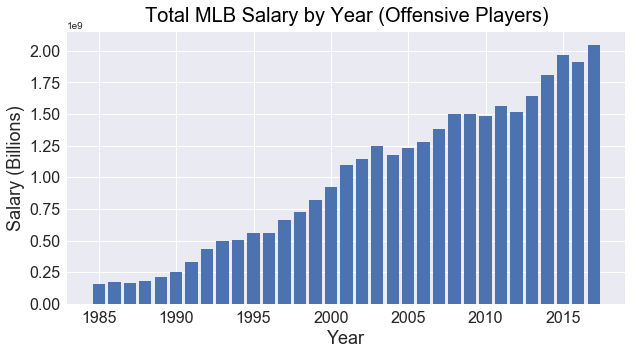

In [61]:
#Maybe throw away 1994 due to the player's strike
title_font = {'fontname':'Arial', 'size':'20', 'color':'black', 'weight':'normal',
              'verticalalignment':'bottom'} # Bottom vertical alignment for more space
axis_font = {'fontname':'Arial', 'size':'18'}

plt.figure(figsize=(10,5))
plt.bar(yearly_summed_bins.index, yearly_summed_bins['SALARY'])
plt.xlabel('Year', **axis_font)
plt.ylabel('Salary (Billions)', **axis_font)
plt.title('Total MLB Salary by Year (Offensive Players)', **title_font)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

In [62]:
# team level data
team_yearly_summed_bins = batters_df.groupby(['TM']).sum()
team_yearly_mean_bins = batters_df.groupby(['TM']).mean()
team_yearly_std_bins = batters_df.groupby(['TM']).std()

team_yearly_summed_bins

,HEIGHT,WEIGHT,YEAR,AGE,PA,AB,R,H,2B,3B,...,OPS+,TB,GDP,HBP,SH,SF,IBB,SALARY,BATS_Left,BATS_Right
TM,,,,,,,,,,,,,,,,,,,,,
ANA,8368,22078,230053,3309.0,44273.0,39614.0,5632.0,10886.0,2077.0,208.0,...,10122.0,17024.0,843.0,423.0,295.0,352.0,283.0,239785333,55.0,75.0
ARI,18558,50811,511889,7410.0,96009.0,85379.0,11950.0,22900.0,4774.0,649.0,...,23600.0,37492.0,1807.0,823.0,340.0,716.0,811.0,607538758,123.0,162.0
ATL,30936,83174,850041,12354.0,162122.0,144013.0,19840.0,38625.0,7405.0,736.0,...,39217.0,61569.0,3444.0,1183.0,759.0,1200.0,1425.0,1029941968,202.0,290.0
BAL,32742,87290,898132,13208.0,173075.0,154522.0,20862.0,40790.0,7668.0,588.0,...,41408.0,65393.0,3780.0,1393.0,957.0,1311.0,969.0,1162154285,195.0,317.0
BOS,31585,84438,872187,12804.0,177421.0,156742.0,23053.0,43497.0,9266.0,811.0,...,42398.0,69280.0,3893.0,1506.0,903.0,1426.0,1401.0,1429968443,197.0,303.0
CAL,12648,31878,346357,5108.0,63813.0,56640.0,7501.0,14743.0,2505.0,290.0,...,15644.0,22535.0,1313.0,391.0,643.0,428.0,447.0,123245266,84.0,122.0
CHC,29712,78347,818113,11957.0,153961.0,137714.0,18642.0,37028.0,7083.0,817.0,...,37681.0,59359.0,3093.0,1167.0,766.0,1081.0,1329.0,1041728590,172.0,280.0
CHW,31260,85603,860164,12328.0,171891.0,153518.0,21253.0,40906.0,7492.0,856.0,...,39848.0,65044.0,3562.0,1392.0,1275.0,1365.0,1029.0,1025953201,188.0,297.0
CIN,32156,87598,882191,12710.0,159114.0,141195.0,19460.0,37673.0,7378.0,775.0,...,41371.0,60386.0,3001.0,1329.0,812.0,1193.0,1465.0,817653503,189.0,312.0


<Container object of 36 artists>

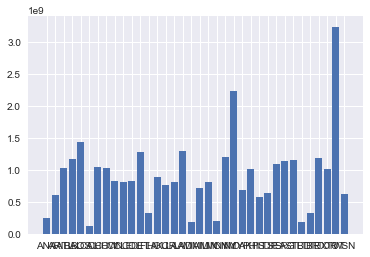

In [63]:
column_to_analyze = 'SALARY'
#team_yearly_summed_bins = team_yearly_summed_bins.sort_values(column_to_analyze)
plt.bar(team_yearly_summed_bins.index, team_yearly_summed_bins[column_to_analyze])

In [64]:
batters_df['LG_SALARY_YEAR'] = batters_df.groupby(['YEAR'])['SALARY'].transform(lambda x: x.sum())
batters_df['LG_SALARY_MEAN'] = batters_df.groupby(['YEAR'])['SALARY'].transform(lambda x: np.log(x.mean()))
columns_of_interest.append('LG_SALARY_YEAR')
columns_of_interest.append('LG_SALARY_MEAN')

In [65]:
#these guys are a problem, remove them
batters_df[columns_of_interest].sort_values('SALARY').head(3)

,NAME,YEAR,AGE,TM,AB,R,H,2B,OPS,HR,RBI,BB,SO,BA,OBP,OPS,SLG,SALARY,LG_SALARY_YEAR,LG_SALARY_MEAN
7830,Dion James,1993,30.0,NYY,343.0,62.0,114.0,21.0,0.856,7.0,36.0,31.0,31.0,0.332,0.390,0.856,0.466,0,493640899,13.905852
5236,Sam Fuld,2010,28.0,CHC,28.0,3.0,4.0,1.0,0.404,0.0,3.0,3.0,5.0,0.143,0.226,0.404,0.179,1,1481971836,15.107826
7216,Micah Hoffpauir,2010,30.0,CHC,52.0,5.0,9.0,3.0,0.476,0.0,5.0,5.0,15.0,0.173,0.246,0.476,0.231,1,1481971836,15.107826


In [66]:
batters_df = batters_df[batters_df.SALARY > 1]

In [67]:
batters_df[columns_of_interest].sort_values('SALARY').head(3)

,NAME,YEAR,AGE,TM,AB,R,H,2B,OPS,HR,RBI,BB,SO,BA,OBP,OPS,SLG,SALARY,LG_SALARY_YEAR,LG_SALARY_MEAN
13161,Jeff Reed,1986,23.0,MIN,165.0,13.0,39.0,6.0,0.629,2.0,9.0,16.0,19.0,0.236,0.308,0.629,0.321,60000,170749498,12.994703
8342,Ron Karkovice,1986,22.0,CHW,97.0,13.0,24.0,7.0,0.758,4.0,13.0,9.0,37.0,0.247,0.315,0.758,0.443,60000,170749498,12.994703
10401,Mark McGwire,1986,22.0,OAK,53.0,10.0,10.0,1.0,0.636,3.0,9.0,4.0,18.0,0.189,0.259,0.636,0.377,60000,170749498,12.994703


In [68]:
#from easymoney.money import EasyPeasy 
#ep = EasyPeasy() 
#batters_df['INFLATION_ADJ_SALARY'] = batters_df.apply(lambda x: ep.normalize(x['SALARY'], from_year=x['YEAR'], to_year="latest", region="US"), axis=1)


In [69]:
batters_df['POS'].unique

<bound method Series.unique of 783        4/56
8084       /D79
7571       4/59
5924      5/364
16348    /74569
759           8
13798       /97
10617        /5
13322       /73
3991        /47
10027         2
13727      /5D7
4876        /79
13795         2
10804         2
13868      /2D3
14047         2
10061         2
6508       /7D9
7196          6
8267        /3D
12432       /45
4966          3
3277        /64
1497         /5
187        /563
9811       /537
10515      7/89
16254         2
12547        /D
          ...  
1531       *5/D
4667       *9/D
14880     *9D/8
1359       *4/D
12783        *8
14519      *8/D
12555        *8
4556     *78D/3
14518      *8/D
12556        *8
13498      *6/D
7942         *6
17149      *6/D
313       *7/89
15158     *98/D
1361      *4/7D
12558        *8
14517      *8/D
7950       *6/D
16041       *3D
10845       *D3
15156     *98/D
16450      *4/D
13613        *6
1527         *5
15154      *9/D
13260        *6
13259        *6
4366         *8
13614    

In [70]:

batters_df['POS'] = batters_df['POS'].str.extract('([\dD])', expand=False)
batters_df = pd.get_dummies(batters_df, columns=['POS'])
batters_df.head(5)

,ID,NAME,HEIGHT,WEIGHT,YEAR,AGE,TM,LG,G,PA,...,POS_1,POS_2,POS_3,POS_4,POS_5,POS_6,POS_7,POS_8,POS_9,POS_D
783,barneda01,Darwin Barney,70,180,2015,29.0,TOT,MLB,17,30.0,...,0,0,0,1,0,0,0,0,0,0
8084,johnsla03,Lance Johnson,70,160,2000,36.0,NYY,AL,18,30.0,...,0,0,0,0,0,0,0,0,0,1
7571,husonje01,Jeff Huson,75,180,1996,31.0,BAL,AL,17,30.0,...,0,0,0,1,0,0,0,0,0,0
5924,gonzare01,Rene Gonzales,75,180,1994,33.0,CLE,AL,22,30.0,...,0,0,0,0,1,0,0,0,0,0
16348,walteza01,Zach Walters,74,210,2015,25.0,CLE,AL,12,30.0,...,0,0,0,0,0,0,1,0,0,0


In [71]:
batters_df['LG_MEAN_HR'] = batters_df.groupby(['YEAR'])['HR'].transform(lambda x: x.median())
#batters_df['HR'].median()

In [72]:
batters_df.to_csv('cleaned_batting_years_1985_to_2017.csv')